In [1]:
# load data
! ls -latr ../data/*.csv
# Añadimos un segundo remoto al original, para trabajar con los datos actualizados
! git remote add original git@github.com:Eclectikus/COVID-19.git
! git pull -f original master

-rw-r--r--  1 jaimevalero  staff  500 23 mar 09:16 ../data/covi0503.csv
-rw-r--r--  1 jaimevalero  staff  497 23 mar 09:16 ../data/covi0603.csv
-rw-r--r--  1 jaimevalero  staff  510 23 mar 09:16 ../data/covi0903.csv
-rw-r--r--  1 jaimevalero  staff  513 23 mar 09:16 ../data/covi1003.csv
-rw-r--r--  1 jaimevalero  staff  521 23 mar 09:16 ../data/covi1103.csv
-rw-r--r--  1 jaimevalero  staff  525 23 mar 09:16 ../data/covi1203.csv
-rw-r--r--  1 jaimevalero  staff  534 23 mar 09:16 ../data/covi1303.csv
-rw-r--r--  1 jaimevalero  staff  552 23 mar 09:16 ../data/covi1603.csv
-rw-r--r--  1 jaimevalero  staff  565 23 mar 09:16 ../data/covi1703.csv
-rw-r--r--  1 jaimevalero  staff  568 23 mar 09:16 ../data/covi1803.csv
-rw-r--r--  1 jaimevalero  staff  576 23 mar 09:16 ../data/covi1903.csv
-rw-r--r--  1 jaimevalero  staff  584 23 mar 09:16 ../data/covi2003.csv
-rw-r--r--  1 jaimevalero  staff  742 23 mar 09:16 ../data/covi2103.csv
-rw-r--r--  1 jaimevalero  staff  746 23 mar 09:16 ../data/covi2

In [2]:
# Load Data
import glob 
import pandas as pd

def Carga_All_Files( ):
    regexp='../data/covi*'
    df = pd.DataFrame()
    # Iterate trough LIST DIR and 
    for my_file in glob.glob(regexp):
        this_df = pd.read_csv(my_file)
        this_df['Fecha'] = my_file
        df = pd.concat([df,this_df])
    return df  

df = Carga_All_Files( )

df.tail()


,ID,CCAA,Casos,IA,UCI,Fallecidos,Hospitalizados,Nuevos,Curados,Fecha
13,942,Madrid,1388,20.77,135,56,NaN,NaN,NaN,../data/covi1203.csv
14,952,Murcia,26,1.74,1,0,NaN,NaN,NaN,../data/covi1203.csv
15,943,Navarra,73,11.16,3,0,NaN,NaN,NaN,../data/covi1203.csv
16,950,País Vasco,346,15.67,18,11,NaN,NaN,NaN,../data/covi1203.csv
17,949,La Rioja,205,64.71,1,2,NaN,NaN,NaN,../data/covi1203.csv


In [3]:
# Formateamos la fecha
df['Fecha'].replace({
    '../data/covi': '2020-',
    '.csv'        : ''}, inplace=True, regex=True)

df['Fecha'] =  pd.to_datetime(df['Fecha'], format='%Y-%d%m')



In [4]:
# Trabajamos solo con una comunidad

COMUNIDAD_A_CONSIDERAR = 'Madrid'
comunidad = df[(df['CCAA'] == COMUNIDAD_A_CONSIDERAR)].sort_values(by='Fecha')
del comunidad['ID']


comunidad.set_index('Fecha', inplace=True)
#
comunidad
comunidad


,CCAA,Casos,IA,UCI,Fallecidos,Hospitalizados,Nuevos,Curados
Fecha,,,,,,,,
2020-03-05,Madrid,90,1.35,2,1,NaN,NaN,NaN
2020-03-06,Madrid,137,2.06,2,2,NaN,NaN,NaN
2020-03-09,Madrid,469,7.04,53,8,NaN,NaN,NaN
2020-03-10,Madrid,782,11.74,77,21,NaN,NaN,NaN
2020-03-11,Madrid,1024,15.34,102,31,NaN,NaN,NaN
2020-03-12,Madrid,1388,20.77,135,56,NaN,NaN,NaN
2020-03-13,Madrid,1990,29.79,180,81,NaN,NaN,NaN
2020-03-16,Madrid,4165,62.07,253,213,NaN,NaN,NaN
2020-03-17,Madrid,4871,72.37,340,355,NaN,NaN,NaN


In [5]:
# Datos de fallecimientos diarios, en totales y tanto por uno.
comunidad['Fallecidos_hoy_absoluto'] = comunidad['Fallecidos'] - comunidad['Fallecidos'].shift(1)
comunidad['Fallecidos_hoy_porcentaje'] = comunidad['Fallecidos_hoy_absoluto']  / comunidad['Fallecidos'] 
comunidad

,CCAA,Casos,IA,UCI,Fallecidos,Hospitalizados,Nuevos,Curados,Fallecidos_hoy_absoluto,Fallecidos_hoy_porcentaje
Fecha,,,,,,,,,,
2020-03-05,Madrid,90,1.35,2,1,NaN,NaN,NaN,NaN,NaN
2020-03-06,Madrid,137,2.06,2,2,NaN,NaN,NaN,1.0,0.500000
2020-03-09,Madrid,469,7.04,53,8,NaN,NaN,NaN,6.0,0.750000
2020-03-10,Madrid,782,11.74,77,21,NaN,NaN,NaN,13.0,0.619048
2020-03-11,Madrid,1024,15.34,102,31,NaN,NaN,NaN,10.0,0.322581
2020-03-12,Madrid,1388,20.77,135,56,NaN,NaN,NaN,25.0,0.446429
2020-03-13,Madrid,1990,29.79,180,81,NaN,NaN,NaN,25.0,0.308642
2020-03-16,Madrid,4165,62.07,253,213,NaN,NaN,NaN,132.0,0.619718
2020-03-17,Madrid,4871,72.37,340,355,NaN,NaN,NaN,142.0,0.400000


Fecha
2020-03-05         NaN
2020-03-06    0.500000
2020-03-09    0.750000
2020-03-10    0.619048
2020-03-11    0.322581
2020-03-12    0.446429
2020-03-13    0.308642
2020-03-16    0.619718
2020-03-17    0.400000
2020-03-18    0.089744
2020-03-19    0.216867
2020-03-20    0.207006
2020-03-21    0.218905
2020-03-22    0.212537
2020-03-23    0.191607
Name: Fallecidos_hoy_porcentaje, dtype: float64

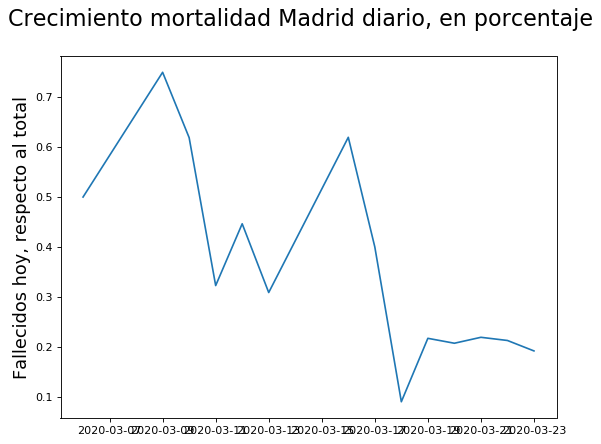

In [6]:
# Grafica

from matplotlib import pyplot as plt    

fig = plt.figure(figsize=(8, 6), dpi=80)
plt.plot( comunidad['Fallecidos_hoy_porcentaje'])
fig.suptitle('Crecimiento mortalidad '+COMUNIDAD_A_CONSIDERAR+' diario, en porcentaje', fontsize=20)
plt.ylabel('Fallecidos hoy, respecto al total', fontsize=16)

comunidad.Fallecidos_hoy_porcentaje

Fecha
2020-03-05      NaN
2020-03-06      1.0
2020-03-09      6.0
2020-03-10     13.0
2020-03-11     10.0
2020-03-12     25.0
2020-03-13     25.0
2020-03-16    132.0
2020-03-17    142.0
2020-03-18     35.0
2020-03-19    108.0
2020-03-20    130.0
2020-03-21    176.0
2020-03-22    217.0
2020-03-23    242.0
Name: Fallecidos_hoy_absoluto, dtype: float64

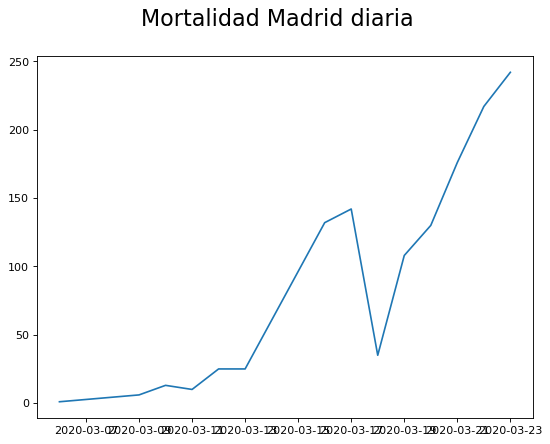

In [7]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(comunidad['Fallecidos_hoy_absoluto']) 
fig.suptitle('Mortalidad '+COMUNIDAD_A_CONSIDERAR+' diaria', fontsize=20)

comunidad.Fallecidos_hoy_absoluto
